# Homework 3: Particles Diffusion physics

NOTE: each plot should have a x-label, a y-label and a legend if multiple lines on the same plot.

## 1 First look at the problem

### 1.1 Introduction to diffusion

We are going to look at the concept of [diffusion](https://en.wikipedia.org/wiki/Diffusion) as a random process where the probability distribution (PDF) of particle positions is following the dynamic of the diffusion equation with dimension $d$:

\begin{equation}
\frac{\partial P(r,t)}{\partial t} = \frac{1}{r^{d-1}}\frac{\partial}{\partial r}\left(r^{d-1}K(r)\frac{\partial P(r,t)}{\partial r}\right)
\end{equation}

where $K(r)$ is the diffusivity (or the diffusion constant if independent of $r$ or $t$) and $r=\sqrt{\sum_{i=1}^d x_i^2}$ is the norm of the position vector $\mathbf{r}=\left(\begin{matrix}
  x_1  \\
  x_2  \\
  \vdots  \\
  x_d
 \end{matrix}\right)$. $P(r,t)$ satisfies

\begin{equation}
\int_{0}^{\infty}r^{d-1}P(r,t) = 1.
\end{equation}

as normalization condition. In the following we are going to look at the $d=1$ for the sake of simplicity.

### 1.2 Power law diffusity: an interesting dynamic

A diffusivity that is dependent of the position norm generates a very rich physics. We are going to consider the case of a power law diffusity:

\begin{equation}
K(r) = Dr^\alpha, \,\,\, 0<\alpha<2
\end{equation}

This diffusivity induces a time evolution

\begin{equation}
\langle r^2(t)\rangle \sim g\left(Dt\right)^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}
\end{equation}

where $\Gamma(x)$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) and $\gamma=2-\alpha$. The PDF has a stretched-exponential distribution

\begin{equation}
P(r,t) = \frac{1}{\langle r^2(t)\rangle^{d/2}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B\right]
\end{equation}

with

\begin{eqnarray}
A&=&\left[\frac{\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}\right]^{\gamma/2}\\
B&=&\log\left[\gamma\frac{\Gamma\left(\frac{d+2}{\gamma}\right)^{d/2}}{\Gamma\left(\frac{1}{\gamma}\right)^{(d+2)/2}}\right]
\end{eqnarray}

In our case are going to work in the specific case of $d=1$ and $\alpha=0$ for simplicity.

### 1.3 Solving the diffusion equation using a Monte Carlo method

The above diffusion equation has an equivalent [Ito](https://en.wikipedia.org/wiki/It%C3%B4_calculus) stochastic differential equation

\begin{equation}
dx = \sqrt{2K}dW
\end{equation}

with $W$ being a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) or Brownian motion. We can numerically integrate the stochastic equations using the [Euler-Maruyama](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) scheme:

\begin{equation}
x(T_i) = x(T_{i-1}) + \sqrt{2K\Delta T}N_{T}
\end{equation}
where $\Delta T = T_n - T_{n-1}$ is a discretized time increment and $N_{T}$ is a standard normal random variable.

## 1.4 Simulating to create our data

Let's make this simulation happen! We are going to write a function that generates particles paths under this diffusive dynamic. The output of this function will be a data frame with each row representing a particle and each column, a specific point in time. The values of this data frame will be the position of the particles at the different point in time. 

Before writing this function, we are going explore how to do it.

>- First, create a data frame with 1000 columns (representing the points in time) and column names `T_0`, `T_1`, ..., `T_999`. We are going to use 100 rows (100 particles) for simplicity. 
- Fill this data frame with a normal noise in each cell using [`numpy.random.normal`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html).
- set the first column to 0 (start at $x=0$).
- Use the pandas function [`cumsum`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html) to generate a cumulative sum of the columns.

Doing so, you are creating stochastic paths for 100 particles for 1000 different time points with $K=1$ and $\Delta T=1$. It should look something like:

<img src="images/initial_stck_path.png" width=800>

In [1]:
import pandas as pd
import numpy as np

## TODO: create a data frame with stochastic paths
paths = pd.DataFrame(np.random.normal(size=(100, 1000)), columns=["T_" + str(i) for i in range(1000)])
paths["T_0"] = 0
paths = paths.cumsum(1)
paths

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,0.0,-0.059301,1.943744,2.955851,4.169724,2.921849,4.060363,5.444777,6.262328,5.507823,...,-10.580265,-9.508412,-9.337464,-8.765823,-10.499340,-10.656268,-11.311689,-8.625483,-7.500680,-7.654628
1,0.0,1.142702,1.529787,3.293198,3.632410,2.866925,1.995436,3.193414,3.818358,5.328152,...,-6.451558,-7.542186,-6.846374,-7.852510,-7.924270,-7.346645,-7.536834,-7.442209,-7.811371,-7.595882
2,0.0,0.377005,0.362454,0.199875,0.434178,0.513763,0.248075,-0.447924,-2.136734,-1.886995,...,49.911146,50.905985,49.089114,49.796479,50.782825,51.211558,51.486518,52.734046,50.705882,50.324458
3,0.0,1.105334,2.286562,3.702046,3.224870,3.391255,2.859177,4.632074,3.469566,3.347389,...,47.174514,47.509718,47.092013,49.445953,49.448608,51.120949,51.230047,54.058028,56.180101,54.592107
4,0.0,-0.323704,-0.684543,-1.864003,-1.714684,-1.945474,-1.511961,-1.443092,-0.913966,-1.190150,...,-32.956747,-32.240404,-32.287209,-33.133706,-32.515764,-31.834040,-31.398318,-32.515581,-32.629646,-30.746306
5,0.0,1.104018,1.744563,0.510442,0.417369,-0.833401,-0.447177,-0.470086,-0.330418,-1.263745,...,65.015460,66.594307,68.301561,66.040789,66.370641,65.649018,65.895341,66.376048,65.989662,64.231604
6,0.0,0.291018,-0.439133,-1.435763,-2.078689,-2.214053,-1.094893,-0.635847,-0.617969,-0.736257,...,0.688301,0.541217,2.614302,2.598577,3.141975,1.237030,2.053912,2.022619,0.942705,1.811957
7,0.0,1.883815,2.575620,2.243860,1.414469,1.300962,0.838048,0.275018,0.185424,1.754344,...,10.898831,12.197765,11.055988,10.652244,9.875822,9.370522,6.496818,4.883665,5.259985,6.117295
8,0.0,0.095434,-0.691907,0.215009,-0.778862,1.101571,-0.552347,-0.075702,-0.384617,0.504932,...,-28.690155,-27.176139,-28.696722,-27.261462,-27.680067,-27.571450,-28.801142,-27.326613,-25.137015,-25.043476
9,0.0,1.561276,1.796987,2.057271,1.245583,0.721386,1.672135,0.433087,0.841019,0.914136,...,-28.949111,-28.875476,-29.106818,-30.290810,-30.905792,-29.688186,-28.881566,-28.529399,-28.593631,-28.685656


Let's visualize those stochastic paths

>- Use [`sample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) to sample 10 samples
- Use [`transpose`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html) to transpose the index and columns
- Use [`reset_index(drop=True)`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) to remove the index
- Use [`plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to plot the resulting samples
- You can set the different graph attributes such that
```
ax = df.plot(fontsize=20)
ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel("position", fontsize=25)
ax.legend(fontsize=20)
```

You should see something like

<img src="images/paths.png" width=700>

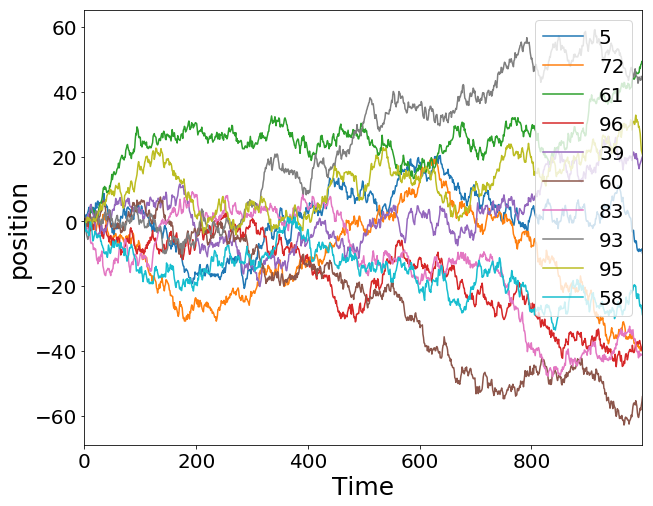

In [131]:
# TODO: plot 10 sample paths
ax = paths.sample(10).transpose().reset_index(drop=True).plot(fontsize=20)
ax.set_xlabel("Time", fontsize=25)
ax.set_ylabel("position", fontsize=25)
ax.legend(fontsize=20)

> Now that we understand how to generate stochastic paths, let's write this function `run_simulation`. Use the different arguments $K$, $\Delta T$, the number of particles `num_particles` and the number of time steps `max_time` to return the desired data frame according to
\begin{equation}
x(T_i) = x(T_{i-1}) + \sqrt{2K\Delta T}N_{T}
\end{equation}
You can use [`numpy.sqrt`](https://www.google.com/search?q=numpy+sart&oq=numpy+sart&aqs=chrome..69i57j0l5.2967j0j4&sourceid=chrome&ie=UTF-8#q=numpy+sqrt) is you need. 

Once again you get something similar to from the function `run_simulation`

<img src="images/diffusion_filled_df.png" width=800>

In [2]:
## TODO: write a function that create a data frame with stochastic paths
def run_simulation(num_particle, max_time, K, deltaT):
    paths = pd.DataFrame(np.random.normal(size=(num_particle, max_time)),
                         columns=["T_" + str(i) for i in range(max_time)]) * np.sqrt(2*K * deltaT)
    paths["T_0"] = 0
    return paths.cumsum(1)

diffusion_filled_df = run_simulation(100, 1000, 2, 1)
diffusion_filled_df

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_990,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999
0,0.0,-0.323441,-0.365458,-0.759791,-2.009651,-4.388052,-4.201347,-3.749294,-3.265813,-3.841912,...,-76.379747,-74.506282,-72.437126,-73.104668,-75.214093,-75.572411,-78.302500,-80.382494,-77.648121,-75.925080
1,0.0,-0.554025,2.683091,6.511181,7.657662,10.195136,10.255621,11.656843,11.268192,6.798362,...,-147.843095,-142.599201,-142.108415,-143.199407,-141.460500,-143.703085,-143.339649,-143.554371,-140.721525,-138.762273
2,0.0,0.761232,1.697179,1.679848,-1.373927,-2.363814,-4.754371,-3.455152,-7.128495,-8.907250,...,-28.433345,-24.576805,-21.048649,-21.777135,-22.082921,-22.569167,-22.573288,-24.714380,-26.064528,-25.051158
3,0.0,3.154243,3.554660,3.340628,1.710841,2.274571,1.740492,-1.177642,-0.524423,0.670752,...,50.442695,48.291059,48.103134,48.563720,49.402092,51.571601,51.958858,50.742039,49.636446,43.716873
4,0.0,0.896175,2.798466,2.649482,3.344730,6.299914,10.485205,12.023148,12.851412,14.179364,...,-35.807747,-33.107329,-35.511985,-34.391598,-34.430978,-33.042868,-34.608032,-36.287026,-33.851562,-33.015268
5,0.0,-1.531344,-2.386454,-3.249437,-6.150365,-5.240725,-6.383040,-7.144690,-4.931831,-4.995632,...,18.674860,18.695359,13.173298,11.709970,13.689746,14.259471,14.301923,15.393205,15.418276,16.412970
6,0.0,-1.931206,-2.375199,-5.241969,-3.736029,-4.964972,-3.581101,0.520035,-2.488954,-3.278399,...,66.818765,68.355472,68.432273,64.715863,65.434751,67.801969,65.214603,64.664665,66.891868,66.367247
7,0.0,-0.009406,1.156258,0.874231,-0.233465,0.102343,0.374365,-1.189711,-4.000325,-5.309740,...,28.514392,29.711458,31.186977,29.770384,29.148009,32.174126,36.741440,36.515044,37.906469,37.207236
8,0.0,-0.717712,-1.053037,1.034647,0.572804,1.101205,1.893396,1.927960,2.579324,3.087534,...,-10.833389,-10.173226,-10.615948,-11.070577,-10.708535,-14.929558,-15.942018,-14.925940,-12.209937,-8.872182
9,0.0,-0.722883,1.716744,3.601492,0.557207,1.088563,-0.748213,-3.740396,-3.989302,-2.470717,...,20.255557,20.276059,20.888227,17.651525,20.601061,23.145257,26.108036,24.168477,25.721014,21.759088


## 2 Studying the data

Up to now, everything was a pretext to create some data to study. Let's try to understand a bit more the physics of those particles. 

### 2.1 The dispersion

We are going to start by computing the dispersion $\langle \Vert \mathbf{r}(t)\Vert^2\rangle$ at different points in time:

>- Let's create a dataframe `dispersion_df` by taking the square the elements of the resulting dataframe using the [`pow`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pow.html) function
- We now take the mean ([`mean`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)) and standard deviation ([`std`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)) of every column. To apply two functions at once on a column you can use the apply function such that:

```
df.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()
```

You should get something like

<img src="images/dispersion.png" width=300>

In [3]:
## TODO: create a dataframe `dispersion_df` by taking the square the elements
dispersion_df = diffusion_filled_df.pow(2)

# TODO: compute the mean and standard deviation of every column of the dispersion_df dataframe
dispersion_avg = dispersion_df.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()
dispersion_avg

,mean,std
T_0,0.000000,0.000000
T_1,4.712814,5.591872
T_2,7.621998,9.105770
T_3,11.992546,14.963766
T_4,15.988870,22.576662
T_5,20.256363,28.805054
T_6,25.641959,37.774746
T_7,32.177257,43.861453
T_8,36.750863,50.559510
T_9,37.505736,50.442319


### 2.2 The confidence interval

Because we computed the sample standard deviation, we can estimate the [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) of the mean. Under the assumption that $\Vert \mathbf{r}(t)\Vert^2$ is normal distributed, we estimate the confidence interval such that

\begin{equation}
\left(\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle - c\frac{S}{\sqrt{L}},\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle + c\frac{S}{\sqrt{L}}\right)
\end{equation}

where $S$ is the estimate of the standard deviation, $L$ is the number of samples used (here the number of particles) and $c$ is a parameter we chose depending on the on confidence level on the average we require. Because the standard deviation is unknown (we are estimating it), $c$ is chosen according to the [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution). For example, when $L$ is very large, $c\simeq1.96$ gives a 95% confidence level for this confidence interval. 

### 2.3 Plotting the dispersion

We are now going to plot the dispersion with matplotlib. We need to create a time array $T$ to represente the time:

>- Create the time array $T$ using the `range` function or the [`np.arange`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function
- Use the [`errorbar`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) function with the $T$ array on the x-axis and `dispersion_avg["mean"]` on the y-axis. Use `1.96*dispersion_avg["std"]` divided by the square-root of the number of particles for the `yerr` argument. 
- use the argument `errorevery` of `errorbar` to decrease the amount of error bars plotted.
- Set the line width to 3 using the `lw` argument
- Set the color of the line to blue by using the `color` argument
- Set the label of the curve to "Dispersion"
- Set the size of the figure to `[10, 8]` using `plt.rcParams["figure.figsize"] = [10, 8]`
- Set the x and y tick label sizes to 20 using `plt.rc('xtick', labelsize=20)`
- Set x label to "Time" with font size 25 using `plt.xlabel("Time", fontsize=25)` and the y label to "$\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle$" with font size 25. You can write math instead of text by using `r"$some math$"`.
- Set the x and y limits by using `plt.xlim(0,1000)` to the min and max of `T` and the dispersion 
- Write out the label of the curve using `plt.legend()` with font size set to 20.


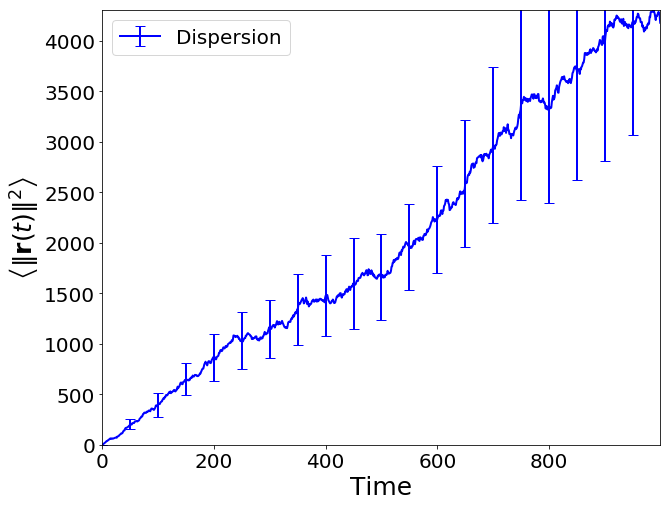

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt

# TODO: create the time array
T = np.arange(dispersion_avg.shape[0])

# TODO: Set the size of the figure to [10, 8]
fig_size = [10, 8]
plt.rcParams["figure.figsize"] = fig_size

# TODO: Set the x and y tick label sizes to 20
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# TODO: plot
num_particles = 100 
plt.errorbar(T, dispersion_avg["mean"],
             yerr=1.96*dispersion_avg["std"] / np.sqrt(num_particles), 
             lw=2,
             color="b",
             label="Dispersion",
             errorevery=50
             , capsize=5)

# TODO: Set the x and y limits
plt.xlim(min(T),max(T))
plt.ylim(min(dispersion_avg["mean"]), max(dispersion_avg["mean"]))

# TODO: Set the x and y labels
plt.xlabel("Time", fontsize=25)
plt.ylabel(r"$\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle$", fontsize=25)

# TODO: write the legend
plt.legend(fontsize=20)

Is the confindence interval negligeable? 

>- Repeat the simulation process until you find a number of particles that yield negligeable confidence interval. 
- Replot the previous curve for 3 different values of `num_particles` to highlight the evolution of the errobars when the number of particles is increased.

You should get something like

<img src="images/dispersion_number.png" width=600>

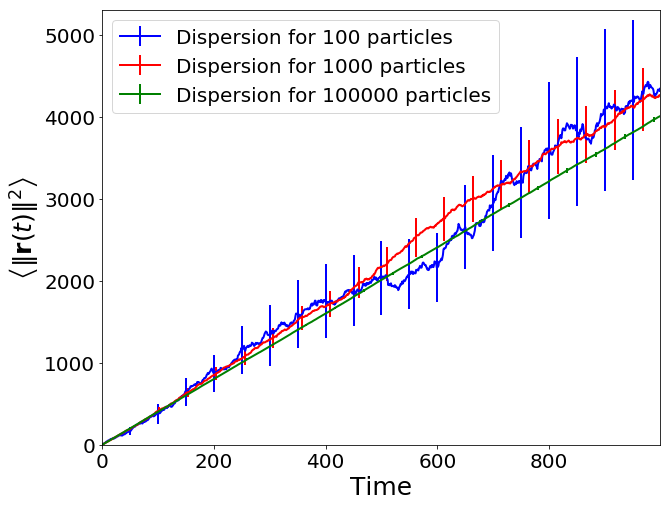

In [5]:
# TODO: choose 3 differents num_particles, recompute the dispersion and those 3 on the same graph

num_particles1 = 100 
num_particles2 = 1000 
num_particles3 = 100000 

diffusion_filled_df1 = run_simulation(num_particles1, 1000, 2, 1)
diffusion_filled_df2 = run_simulation(num_particles2, 1000, 2, 1)
diffusion_filled_df3 = run_simulation(num_particles3, 1000, 2, 1)

dispersion_df1 = diffusion_filled_df1.pow(2)
dispersion_df2 = diffusion_filled_df2.pow(2)
dispersion_df3 = diffusion_filled_df3.pow(2)


dispersion_avg1 = dispersion_df1.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()
dispersion_avg2 = dispersion_df2.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()
dispersion_avg3 = dispersion_df3.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()

plt.errorbar(T, dispersion_avg1["mean"],
             yerr=1.96*dispersion_avg1["std"] / np.sqrt(num_particles1), 
             lw=2, color="b", label="Dispersion for 100 particles", errorevery=50)

plt.errorbar(T, dispersion_avg2["mean"],
             yerr=1.96*dispersion_avg2["std"] / np.sqrt(num_particles2), 
             lw=2, color="r", label="Dispersion for 1000 particles", errorevery=51)

plt.errorbar(T, dispersion_avg3["mean"],
             yerr=1.96*dispersion_avg3["std"] / np.sqrt(num_particles3), 
             lw=2, color="g", label="Dispersion for 100000 particles", errorevery=52)

# TODO: Set the x and y limits
plt.xlim(min(T),max(T))
plt.ylim(min(dispersion_avg["mean"]), max(dispersion_avg["mean"] + 1000))

# TODO: Set the x and y labels
plt.xlabel("Time", fontsize=25)
plt.ylabel(r"$\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle$", fontsize=25)

# TODO: write the legend
plt.legend(fontsize=20)

>So what value of `num_particles` seems acceptable to present a statistically converged averages?

Remember that 

\begin{equation}
\langle r^2(t)\rangle \sim g\left(Dt\right)^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}
\end{equation}

for 

\begin{equation}
K(r) = Dr^\alpha, \,\,\, 0\leq\alpha<2
\end{equation}

>- What is the value of $\gamma$ here?
- Write function that compute $g$ given $\gamma$ and $d$. Use the [`scipy.special.gamma`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.gamma.html) function and [`np.power`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html)

In [11]:
from scipy.special import gamma as G

# TODO: write a function that compute g
def g(gamma, d):
    return np.power(gamma, 4./gamma) * G((d+2)/gamma) / G(d/gamma)

>- Plot `T` versus `dispersion_avg["mean"] / T` with label "Dispersion"
- Add an horizontal line to the graph using [`axhline`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.axhline.html) with argument `y = g(gamma, d) * K, color="r", lw=2, ls="--"` and label "Diffusive regime"

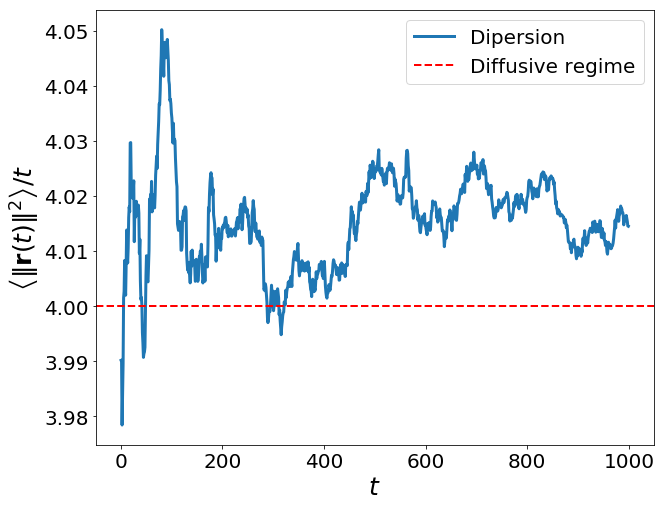

In [12]:
# TODO: T versus dispersion_avg["mean"] / T
plt.plot(T, dispersion_avg3["mean"]/ T, lw=3, label="Dipersion")
plt.xlabel(r"$t$", fontsize=25)
plt.ylabel(r"$\left\langle\Vert\mathbf{r}(t)\Vert^2\right\rangle / t$", fontsize=25)

# TODO: add horizontal line for the diffusive regime
plt.axhline(g(2, 1) * 2, color="r", lw=2,  ls="--", label="Diffusive regime")

plt.legend(fontsize=20)

### 2.4 The probability distribution

We now going to estimate the probability distribution $P(r,t)$ at different times. To estimate a probability distribution at $r_i$ and $t=t^*$, we can simply count the number of samples in a small region $\Delta r_i$ around $r_i$. Because we have

\begin{equation}
\int_{0}^{\infty}r^{d-1}P(r,t) = 1
\end{equation}

We need our estimate $\hat{P}(r_i,t^*)$ of the probabitity distribution 

\begin{equation}
\sum_{i=1}^{M}\hat{P}(r_i,t^*)\Delta r_i = 1
\end{equation}

where $M$ is the number of discretized space increments $\Delta r_i$. Therefore we can estimate 

\begin{equation}
\hat{P}(r_i,t^*) = \frac{n}{N\Delta r_i}
\end{equation}

where $n$ is the number of samples in the interval $\Delta r_i$ at time $t^*$ and $N$ is the total number of samples. Let's check that this work

\begin{equation}
\sum_{i=1}^{M}\hat{P}(r_i,t^*)\Delta r_i = \sum_{i=1}^{M}\frac{n}{N\Delta r_i}\Delta r_i= \frac{1}{N}\sum_{i=1}^{M}n =1
\end{equation}


We are going to write a function that compute the probability distribution. This function will return the probability distribution along with the a set of $r_i$:

>- use the pandas [`qcut`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html) function to cut in quantiles the absolute values of the positions in `diffusion_filled_df` for a specific column. Use the argument `q` to choose the number of cuts and use `retbins=True` to return the bins into a `bins` variable. Use this function to create a new column "cut" in `diffusion_filled_df`
- You can now create the $\Delta r_i$ intervals by using the trick `deltaR = bins[1:] - bins[:-1]` 
- group by using the pandas `groupby` this new column "cut" to count using the function [`count`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
- divide the resulting quantity by `deltaR * num_particles`. At that point, you obtained a statistical estimation of the probability distribution.
- group by using the pandas `groupby` this new column "cut" and use the pandas `apply` method to return the median of the absolute value of the positions at that point in time. This gives you the set of $r_i$s.

In [60]:
def compute_prob_distribution(absolute_position, num_cuts):

    absolute_position_copy = absolute_position.copy().to_frame("Position")
    
    # TODO: cut absolute_position using qcut and num_cuts
    absolute_position_copy["cut"], bins = pd.qcut(absolute_position, num_cuts, retbins=True)
    
    # TODO: compute deltaR
    deltaR = bins[1:] - bins[:-1]
    
    # TODO: compute the counts per cuts of the column "cut"
    counts = absolute_position_copy.groupby("cut")["Position"].count()
    
    # TODO: normalize the counts to get the probability distribution
    pdf = counts / absolute_position.shape[0] / deltaR
    
    # TODO: compute the median per cuts of the column "cut" of the absolute position
    r = absolute_position_copy.groupby("cut")["Position"].median()
    
    return pdf, r

We are going to compare the result of this function with the theoretical results. Remember that 

\begin{equation}
P(r,t) = \frac{1}{\langle r^2(t)\rangle^{d/2}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B\right]
\end{equation}

with

\begin{eqnarray}
A&=&\left[\frac{\Gamma\left(\frac{d+2}{\gamma}\right)}{\Gamma\left(\frac{d}{\gamma}\right)}\right]^{\gamma/2}\\
B&=&\log\left[\gamma\frac{\Gamma\left(\frac{d+2}{\gamma}\right)^{d/2}}{\Gamma\left(\frac{1}{\gamma}\right)^{(d+2)/2}}\right]
\end{eqnarray}

- Write a function `A(gamma, d)`
- Write a function `B(gamma, d)`
- Write a function `dispersion` that returns $g\left(Dt\right)^{2/\gamma}$. You already wrote the function that computes $g$.
- Write a function `pdf(gamma, d, r, t, D)` with `r` being an array of absolute positions $r$ and `t` the time the pdf is computed. Use the function [`np.exp`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

In [61]:
# TODO: write a function that computes A
def A(gamma, d):
    return np.power(G((d+2)/gamma) / G(d/gamma),gamma/2)

# TODO: write a function that computes B
def B(gamma, d):
    return np.log(gamma * np.power(G((d+2)/gamma), d/2.) / np.power(G(d/gamma), (d+2)/2))

# TODO: write a function that computes the dispersion
def dispersion(gamma, d, t, D):
    return g(gamma, d) * np.power(D * t, 2/gamma) 

def pdf(gamma, d, r, t, D):
    a = A(gamma, d)
    b = B(gamma, d)
    r2 = dispersion(gamma, d, t, D)
    return np.power(r2, -d/2) * np.exp(-a * np.power(r / np.sqrt(r2), gamma) + b)


>- Plot the estimated probability distribution at the same time that for the theoretical pdf.

You should get something like
<img src="images/pdfs.png" width=600>

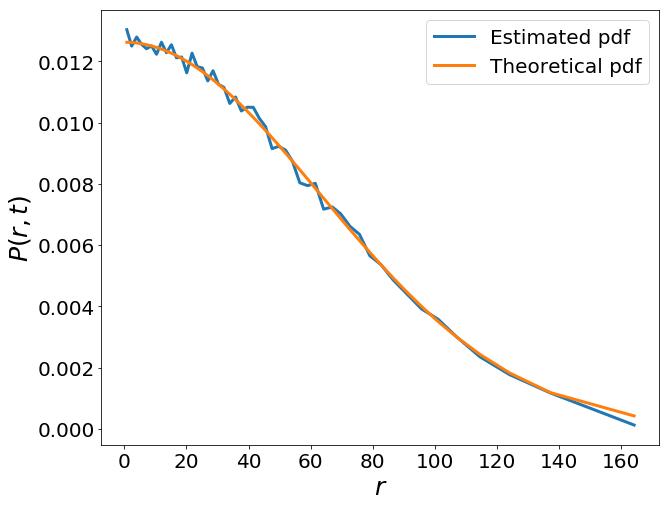

In [64]:
# TODO: compute the estimated pdf and use the r array to show the theoretical one
pdf_est , r = compute_prob_distribution(diffusion_filled_df3["T_999"].abs(), 50)
pdf_theor = pdf(2, 1, r, 999, 2)

plt.plot(r, pdf_est, label="Estimated pdf", lw=3)
plt.plot(r, pdf_theor, label="Theoretical pdf", lw=3)

plt.xlabel(r"$r$", fontsize=25)
plt.ylabel(r"$P(r,t)$", fontsize=25)

plt.legend(fontsize=20)

### 2.5 The self-similarity of the probability distribution

Notice that 

\begin{equation}
\log\left(P(r,t)\langle r^2(t)\rangle^{d/2}\right) = -A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B
\end{equation}

If we look at the relationship of $Y=\log\left(P(r,t)\langle r^2(t)\rangle^{d/2}\right)$ versus $X=\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma$ for any $r$ and $t$, we should observe a linear relationship.

> Using your statistical estimation of the the PDF, plot on the same graph $\log\left(P(r,t)\langle r^2(t)\rangle^{1/2}\right)$ versus $\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma$ for:
- t = 199
- t = 399
- t = 599
- t = 799
- t = 999

using your statistical estimation of the the PDF.

You can use [`np.log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html). You should get something like
<img src="images/self_sim.png" width=600>

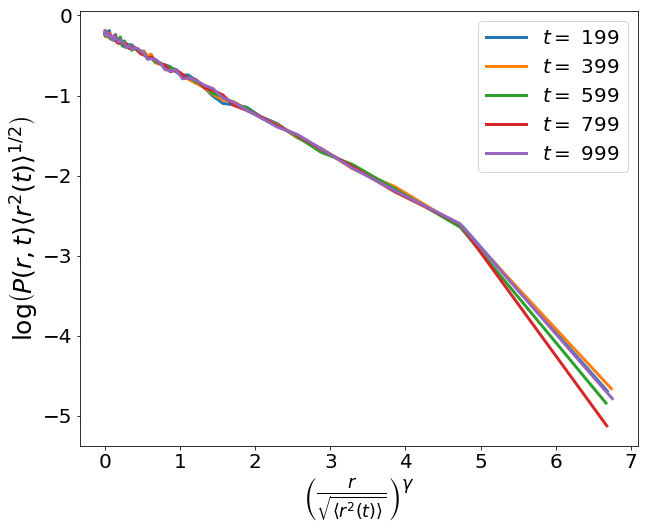

In [120]:
times = [199, 399, 599, 799, 999]
gamma = 2

for time in times:
    col = "T_" + str(time)
    pdf_est , r = compute_prob_distribution(diffusion_filled_df3[col].abs(), 50)
    r_t = dispersion_avg3.loc[col, "mean"]
    plt.plot(np.power(r /np.sqrt(r_t), gamma), np.log(pdf_est * np.sqrt(r_t)), label=r"$t=$ " + str(time), lw=3)
    
plt.xlabel(r"$\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma$", fontsize=25)
plt.ylabel(r"$\log\left(P(r,t)\langle r^2(t)\rangle^{1/2}\right)$", fontsize=25)
plt.legend(fontsize=20)

It seems to work but the last points seem misestimated

## 3 Statistical tests

###  3.1 t-test

Intuitively we can see that the variable $\frac{\Vert \mathbf{r}(t)\Vert}{\sqrt{\langle r^2(t)\rangle}}$ has a probability distribution that is independent of the time. Let's test this hypothesis by doing a [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) statistics.

>- take 2 different times (columns) in `diffusion_filled_df` and rescale the absolute values by the corresponding `np.sqrt(dispersion_avg.loc[time, "mean"])`
- Use [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to compare the statistics of the 2 samples
- What can we conclude from the [p-value](https://en.wikipedia.org/wiki/P-value)?

In [89]:
from scipy import stats

# TODO: choose 2 times to perform a t-test

time = 999
col = "T_" + str(time)
one = diffusion_filled_df3[col].abs() / np.sqrt(dispersion_avg3.loc[col, "mean"])

time = 599
col = "T_" + str(time)
two = diffusion_filled_df3[col].abs() / np.sqrt(dispersion_avg3.loc[col, "mean"])

stats.ttest_ind(one, two)

Ttest_indResult(statistic=0.016217330948376782, pvalue=0.98706102536110008)

We can actually look at all the sample by performing a more general analysis of variance or [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) for all the times at once

>- Divide `diffusion_filled_df` by `dispersion_avg3["mean"]`
- Use the function [`stats.f_oneway`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.f_oneway.html) to perform the ANOVA with a [f-distribution](https://en.wikipedia.org/wiki/F-distribution)
- You will need to use the underlying numpy array of the data frame (`.values`), then avoid the first column (`[:,1:]`) (because it was all 0) and take the transpose (`.T`). The resulting array is a list of lists and you can [unpack](https://stackoverflow.com/questions/3480184/unpack-a-list-in-python) it using `*(df.values[:,1:].T)`.
- What can you conclude from the p-value? Can you show that it was expected?

In [132]:
# TODO: perform an ANOVA

df = diffusion_filled_df3.abs() / np.sqrt(dispersion_avg3["mean"])
stats.f_oneway(*(df.values[:,1:].T))

F_onewayResult(statistic=0.066218033765413811, pvalue=0.99999999999999989)